In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mariu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [64]:
#data_nrw = pd.read_csv(r"C:\Users\mariu\Documents\Project Local Elections\nrw\nrw_data.csv", encoding="utf8", sep=';')
data_bw = pd.read_csv(r"C:\Users\mariu\Downloads\All_data_BW_1.csv", encoding="utf8", sep=';')
data_bayern = pd.read_csv(r"C:\Users\mariu\Downloads\bayern_complete_1 (2).csv", encoding="utf8", sep=';')

C:\Users\mariu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (49,51,52,71,72,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
data_bayern['woman'] = 1 - data_bayern['Male']

In [66]:
use_bay = data_bayern[['full_name', 'votes', 'party', 'woman', 'year', 'city', 'muslim','incumbent', 'place_list', 'non_muslim_migrant', 'job']]
use_bw = data_bw[['year', 'city', 'party', 'votes', 'place_list', 'muslim_migrant', 'incumbent', 'job', 'non_muslim_migrant', 'woman', 'Name_total']] # transform
#use_nrw = data_nrw[['Name_total', 'Stadt', 'Beruf', 'Geburtsjahr', 'Stimmen', 'Incumbent', 'Jahr', 'Partei_y']]
use_bay = use_bay.rename({'full_name': 'Name_total'}, axis=1)
#use_nrw = use_nrw.rename({'Stadt':'city', 'Beruf':'job', 'Geburtsjahr': 'birth', 'Stimmen':'votes', 'Incumbent':'incumbent', 'Jahr':'year', 'Partei_y':'party'}, axis=1)
use_bw = use_bw.rename({'muslim_migrant': 'muslim'},axis=1)

In [67]:
data_total = use_bay.append(use_bw)
#data_total = data_total.append(use_nrw)
data_total

,Name_total,votes,party,woman,year,city,muslim,incumbent,place_list,non_muslim_migrant,job
0,Iris Wassill,NaN,AfD,0.0,2020,München,0,0.0,1,1,Unternehmensjuristin
1,Markus Walbrunn,NaN,AfD,0.0,2020,München,0,0.0,2,0,wissenschaftl. Mitarbeiter
2,Daniel Stanke,NaN,AfD,0.0,2020,München,0,0.0,3,0,Dipl.-Wirtschaftsingenieur
3,Andreas Reuter,NaN,AfD,0.0,2020,München,0,0.0,4,0,Büroleiter
4,Roland Klemp,NaN,AfD,0.0,2020,München,0,0.0,5,0,med. Dokumentar
...,...,...,...,...,...,...,...,...,...,...,...
11562,Peter Ocker,6990.0,ödp,0.0,2019,Stuttgart,0,0.0,14,0,Entwicklungsingenieur
11563,Patrick Zolg,5972.0,ödp,0.0,2019,Stuttgart,0,0.0,5,0,Werkschutzmeister
11564,Jutta Braun,6070.0,ödp,1.0,2019,Stuttgart,0,0.0,7,0,Verwaltungsfachangestellte
11565,Martha Pfizenmeier,7397.0,ödp,1.0,2019,Stuttgart,0,0.0,3,0,Renterin


In [68]:
data_aggregated = data_total.groupby(['year', 'party', 'city'], as_index=False).sum()
data_count = data_total.groupby(['year', 'party', 'city'], as_index=False).count()[['Name_total','year', 'party', 'city']]
data_count = data_count.rename({'Name_total': 'number_candidates'},axis=1)
data_aggregated = pd.merge(data_aggregated, data_count, on=['year', 'city', 'party'], how='left', validate='1:1')
data_aggregated['sh_women'] = data_aggregated['woman']/data_aggregated['number_candidates']
data_aggregated['sh_muslim'] = data_aggregated['muslim']/data_aggregated['number_candidates']
data_aggregated = data_aggregated.drop(['place_list', 'votes'], axis=1)
data_aggregated

,year,party,city,woman,muslim,incumbent,non_muslim_migrant,number_candidates,sh_women,sh_muslim
0,2002,ASP,München,7.0,0,1.0,0,40,0.175000,0.000000
1,2002,Aktive Bürger,Selb,5.0,0,0.0,2,24,0.208333,0.000000
2,2002,BIA,Nürnberg,9.0,0,0.0,0,25,0.360000,0.000000
3,2002,BIL,Nürnberg,13.0,12,0.0,2,28,0.464286,0.428571
4,2002,CSU,Bayreuth,17.0,0,0.0,3,44,0.386364,0.000000
...,...,...,...,...,...,...,...,...,...,...
1249,2020,ödp,Rosenheim,23.0,0,1.0,2,44,0.522727,0.000000
1250,2020,ödp,Schweinfurt,18.0,0,1.0,0,44,0.409091,0.000000
1251,2020,ödp,Straubing,21.0,1,2.0,1,40,0.525000,0.025000
1252,2020,ödp,Unterschleißheim,13.0,0,2.0,0,21,0.619048,0.000000


In [69]:
data_aggregated['city'] = data_aggregated.city.str.replace('ö','o').str.replace('ä', 'a').str.replace('ü', 'u').str.replace('ß', 'ss').str.replace('Ü', 'U').str.replace('Ä', 'A').str.replace('Ö', 'O')
list_cities = pd.Series(data_aggregated['city'].unique())

In [70]:
data_aggregated.loc[data_aggregated['year'] == 20200, 'year'] = 2020

In [138]:
data_aggregated.to_csv(r'C:\Users\mariu\documents\data_list_shares.csv')

In [9]:
# Work on the crime data, mostly string transformations
data_crime = pd.read_csv(r"C:\Users\mariu\Downloads\afd18_bis_19_2.csv", delimiter=';', encoding='latin1')
data_crime = data_crime[~data_crime['party_1'].str.contains('Betroffene Partei', na=False)]
data_crime = data_crime.dropna(thresh=7)
data_crime['crime'] = data_crime.crime.str.replace('[', 'l').str.replace('(', '').str.replace(')', '')

data_crime['crime'] = data_crime.crime.str.replace('des Diebstahls', 'Besonders schwerer Fall des Diebstahls').str.replace('SachbeschMigung',
                                                                                                                           'Sachbeschadigung')
data_crime['crime'] = data_crime.crime.str.replace('Besonders schwerer Fall',
                                                   'Besonders schwerer Fall des Diebstahls').str.replace('SachbescNdigung',
                                                                                                         'Sachbeschadigung')
data_crime['crime'] = data_crime.crime.str.replace('offentlichen Friedens',
                                                   'Storung des offentlichen Friedens').str.replace('staatlicher Symbole',
                                                                                                    'Verunglimpfung staatlicher Symbole')
data_crime['crime'] = data_crime.crime.str.replace('SachbescNdigung',
                                                   'Sachbeschadigung').str.replace('Organisationen', 
                                                                                   'Verwenden von Kennzeichen verfassungsfeindlicher Organisationen')
data_crime['crime'] = data_crime.crime.str.replace('KOrperverletzung',
                                                   'Korperverletzung').str.replace('politischen ', 
                                                                                   'Verleumdung von Personen des politischen Lebens')
data_crime['crime'] = data_crime.crime.str.replace('Gefahrlicher Eingriff',
                                                   'Gefahrlicher Eingriff in den Strassenverkehr').str.replace('Verstorbener', 
                                                                                   'Verunglimpfung des Andenkens Verstorbener')
data_crime['crime'] = data_crime.crime.str.replace(r'(^Andenkens$)',
                                                   'Verunglimpfung des Andenkens Verstorbener').str.replace('BilLigung von Straftaten', 'Billigung von Straftaten')

data_crime['crime'] = data_crime.crime.str.replace('ALe Nachrede', 'Uble Nachrede').str.replace(r'(^Sprengstoffexplosion$)', 'Herbeifuhren einer Sprengstoffexplosion')

data_crime['crime'] = data_crime.crime.str.replace('Versammlungsgesetz',
                                                   'Verstoß gegen das Versammlungsgesetz').str.replace('sexueEle Grundlage', 'Verleumdung ohne sexuelle Grundlage')

data_crime['crime'] = data_crime.crime.str.replace('den StraRenverkehr',
                                                   'Gefahrlicher Eingriff in den Strassenverkehr').str.replace('and Abzeichen',
                                                                                                               'Missbrauch von Titeln, Berufsbezeichnungen und Abzeichen')
data_crime['crime'] = data_crime.crime.str.replace(r'(^Verwenden von$)',
                                                   'Verwenden von Kennzeichen verfassungsfeindlicher Organisationen').str.replace('Kunsturhebergesetz',
                                                                                                                                  'Verstoss gegen das Kunsturhebergesetz')
data_crime['crime'] = data_crime.crime.str.replace('Sachbeschkligung',
                                                   'Sachbeschadigung').str.replace('n, Weltanschauungen',
                                                                                   'Beleidigung, Beschimpfung von Bekentnisse, Religionsgemeinschaften und Weltanschauungen')
data_crime['crime'] = data_crime.crime.str.replace('Ube Nachrede',
                                                   'Uble Nachrede').str.replace('sexuelle Grundlage',
                                                                                   'Verleumdung ohne sexuelle Grundlage')
data_crime['crime'] = data_crime.crime.str.replace('Kennzeichen', 'Verwenden von Kennzeichen verfassungsfeindlicher Organisationen').str.replace('Kdrperverletzung', 'Korperverletzung')
data_crime['crime'] = data_crime.crime.str.replace('Stragenverkehrs', 'Gefahrlicher Eingriff in den Strassenverkehr').str.replace('lible Nachrede', 'Uble Nachrede')
data_crime['crime'] = data_crime.crime.str.replace('verfassungswidriger',
                                                   'Verwenden von Kennzeichen verfassungsfeindlicher Organisationen').str.replace('Sachbesch5digung', 'Sachbeschadigung')

data_crime['crime'] = data_crime.crime.str.replace('SachbeschÃ¤digung', 'Sachbeschadigung').str.replace('geringwertiger Sachen', 'Diebstahl geringwertiger Sachen')
data_crime['crime'] = data_crime.crime.str.replace('SachbescUdigung', 'Sachbeschadigung').str.replace('GemeinschÃ¤dliche', 'Gemeinschadliche Sachbeschadigung')
data_crime['crime'] = data_crime.crime.str.replace('Schwere GefÃ¤hrdung', 
                                                   'Schwere Gefahrdung durch Freisetzen von Giften').str.replace('Ã\x9cble Nachrede', 'Uble Nachrede')
data_crime['crime'] = data_crime.crime.str.replace('KÃ¶rperverletzung', 'Korperverletzung').str.replace('Androhung von', 'Androhung von Straftaten')
data_crime['crime'] = data_crime.crime.str.replace('Â§ 123 StGB', 'Hausfriedensbruch').str.replace('GefÃ¤hrliche', 'Gefahrliche Korperverletzung')
data_crime['crime'] = data_crime.crime.str.replace('VerstoÃ\x9f', 'Verstoß gegen das Versammlungsgesetz').str.replace('Ã\x96ffentliche', 'offentliche Aufforderung zu Straftaten')
data_crime['crime'] = data_crime.crime.str.replace('NÃ¶tigung', 'Notigung').str.replace('VortÃ¤uschen einer', 'Vortauschen einer Straftat')
data_crime['crime'] = data_crime.crime.str.replace('Â§ 248a StGB', 'Diebstahl und Unterschlagung geringwertiger Sachen').str.replace('WÃ¤hlertÃ¤uschung', 'Wahlertauschung')
data_crime['crime'] = data_crime.crime.str.replace('STGB-315B', 'Gefahrlicher Eingriff in den Strassenverkehr').str.replace('WahlfÃ¤lschung', 'Wahlfalschung')
data_crime['crime'] = data_crime.crime.str.replace('Wohnungseinbruchsdie', 'Wohnungseinbruchsdiebstahl').str.replace('Verletzung des', 'Verletzung des höchstpersönlichen Lebensbereichs')
data_crime['crime'] = data_crime.crime.str.replace('Â§ 140 StGB',
                                                   'Belohnung und Billigung von Straftaten').str.replace('Verfassungsfeindliche',
                                                                                                         'Verwenden von Kennzeichen verfassungsfeindlicher Organisationen')
data_crime['crime'] = data_crime.crime.str.replace('STGB-255',
                                                   'Misshandlung von Schutzbefohlenen').str.replace('Diebstahl und', 'Diebstahl und Unterschlagung geringwertiger Sachen')
data_crime['crime'] = data_crime.crime.str.replace('Ã\x9cble Nachrede und',
                                                   'Uble Nachrede').str.replace('GefÃ¤hrlicher Eingriff in',
                                                                                'Gefahrlicher Eingriff in den Strassenverkehr').str.replace('RÃ¤uberischer Diebstahl',
                                                                                                                                           'Rauberischer Diebstahl')


data_crime['crime'] = data_crime.crime.str.replace('Verwenden von Verwenden von Kennzeichen verfassungsfeindlicher Organisationen verfassungsfeindlicher Organisationen',
                                                   'Verwenden von Kennzeichen verfassungsfeindlicher Organisationen').str.replace('Diebstahl und Unterschlagung geringwertiger Sachen Unterschlagung geringwertiger Sachen',
                                                                                'Diebstahl und Unterschlagung geringwertiger Sachen')
data_crime['crime'] = data_crime.crime.str.replace('Gefahrliche Korperverletzungr Eingriff in',
                                                   'Gefahrliche Korperverletzung').str.replace('Uble Nachrede und', 'Uble Nachrede')

In [10]:
data_crime = data_crime.rename({'ï»¿day': 'date'}, axis=1)
data_crime = data_crime.rename({'Unnamed: 11': 'party_6', 'Unnamed: 12': 'party_7'}, axis=1)
list_columns = ['party_1', 'party_2', 'party_3', 'party_4','party_5', 'party_6', 'party_7']

for column in list_columns:
    data_crime.loc[data_crime[column].str.contains('90/', na=False), column] = 'Grune'
    data_crime.loc[data_crime[column].str.contains('SP', na=False), column] = 'SPD'
    data_crime.loc[data_crime[column].str.contains('A', na=False), column] = 'AfD'


In [11]:
data_crime['place'] = data_crime.place.str.replace('StaRfurt', 'Stassfurt').str.replace('GieBen', 'Giessen').str.replace('MeiRen', 'Meissen').str.replace('Ma hlow', 'Mahlow')
data_crime['place'] = data_crime.place.str.replace('K6then', 'Kothen').str.replace(r'(^Kan$)', 'Kandel').str.replace('LUbeck', 'Lubeck')
data_crime['place'] = data_crime.place.str.replace('WeiBwasser', 'Weisswasser').str.replace('GrUnheide', 'Grunheide').str.replace('GroBbeeren', 'Grossbeeren').str.replace('Niederg6rsdorf', 'Niedergorsdorf')
data_crime['place'] = data_crime.place.str.replace(r'(^Blankenfelde-$)', 'Blankenfelde-Mahlow').str.replace(r'(^Mahlow$)', 'Blankenfelde-Mahlow').str.replace('JUterbog', 'Juterborg').str.replace('LObben', 'Lubben')
data_crime['place'] = data_crime.place.str.replace('Fiirstenberg', 'Furstenberg').str.replace('Niederwiirschnitz', 'Niederwurschnitz').str.replace('MeiBen', 'Meissen').str.replace('Bad DLiben', 'Bad Duben')
data_crime['place'] = data_crime.place.str.replace('GrogschOnau', 'Grossschonau').str.replace('Ro6wein', 'Rosswein').str.replace('BrOssow', 'Brussow').str.replace('Kabschiitztal', 'Kabschutztal')
data_crime['place'] = data_crime.place.str.replace('&glitz', 'Stassfurt').str.replace('EisenhOttenstadt', 'Eisenhuttenstadt').str.replace('Wei8wasser', 'Weisswasser').str.replace('ClauRnitz', 'Claussnitz')
data_crime['place'] = data_crime.place.str.replace('Bad Gottleuba-BerggieRhObel',
                                                   'Bad Gottleuba-Berggiesshübel').str.replace('K011stedt',
                                                                                               'Kullstedt').str.replace('Ã¶',
                                                                                                                        'o').str.replace('Ã¤',
                                                                                                                                         'a').str.replace('Ã¼', 'u').str.replace('Ã\x9f', 'ss')

data_crime['place'] = data_crime.place.str.replace(r'(^Villingen-$)', 'Villingen-Schwenningen').str.replace('Borstel-', 'Borstel-Hohenrade').str.replace('Kleinblittersdo', 'Kleinblittersdorf')
data_crime['place'] = data_crime.place.str.replace('Steinbach-', 'Steinbach-Hallenberg').str.replace('Leinefelde-', 'Leinefelde-Worbis').str.replace(r'(^Osterholz-$)', 'Osterholz-Schwarmbeck')
data_crime['place'] = data_crime.place.str.replace('Recklinghause', 'Recklinghausen').str.replace(r'(^Schwarzenber$)', 'Schwarzenberg').str.replace('GroBkmehlen', 'Grosskmehlen')
data_crime['place'] = data_crime.place.str.replace('Oer-', 'Oer-Erkenschwick').str.replace(r'(^Krakow am$)', 'Krakow am See').str.replace('Ma hlow', 'Blankenfelde-Mahlow')
data_crime['place'] = data_crime.place.str.replace('Liibeck', 'Lubeck').str.replace('NiederwEirschnitz', 'Niederwurschnitz').str.replace('Grog Kreutz', 'Gross Kreutz')
data_crime['place'] = data_crime.place.str.replace('Villingen-SchwenningenSchwenningen','Villingen-Schwenningen').str.replace('GroRschonau','Grossschonau').str.replace('Jiiterbog','Juterbog')
data_crime['place'] = data_crime.place.str.replace('Kleinblittersdorfrf', 'Kleinblittersdorf').str.replace('Leinefelde-WorbisWorbis', 'Leinefelde-Worbis').str.replace(r'(^Wolfratshause$)', 'Wolfratshausen')
data_crime['place'] = data_crime.place.str.replace('Meifien', 'Meissen').str.replace('Georgensgmu', 'Georgensgmund').str.replace(r'(^Eisenhuttensta$)', 'Eisenhuttenstadt')
data_crime['place'] = data_crime.place.str.replace('Brotterode-', 'Brotterode-Trusetal').str.replace('LCibeck', 'Lubeck').str.replace('DobeIn', 'Dobeln')
data_crime['place'] = data_crime.place.str.replace('StaBlurt', 'Stassfurt').str.replace('KOIn', 'Koln').str.replace('Grogschonau', 'Grossschonau')
data_crime['place'] = data_crime.place.str.replace('DobeIn', 'Dobeln').str.replace('Griinheide', 'Grunheide').str.replace('Liibben', 'Lubben')
data_crime['place'] = data_crime.place.str.replace('GrUnhain-Beierfeld', 'Grunhain-Beierfeld').str.replace('Jaterbog', 'Juterbog').str.replace('GrUnow', 'Grunow')
data_crime['place'] = data_crime.place.str.replace('FOrstenberg', 'Forstenberg').str.replace(r'(^Brieskow-$)', 'Brieskow-Finkenheerd').str.replace('Got-litz', 'Gorlitz')
data_crime['place'] = data_crime.place.str.replace('airlitz', 'Gorlitz').str.replace('Ro8wein', 'Rosswein').str.replace('BerggierShilibel', 'Bad Gottleuba-Berggiesshubel')
data_crime['place'] = data_crime.place.str.replace('ohringen', 'Ohringen').str.replace('Wolfenbiittel', 'Wolfenbuttel').str.replace(r'(^Schonwalde-$)', 'Schonwalde-Glien')
data_crime['place'] = data_crime.place.str.replace('MOnster', 'Munster').str.replace(r'(^Heilbad$)', 'Heilbad Heiligenstadt').str.replace(r'(^Tauberbischofshe$)', 'Tauberbischofsheim')
data_crime['place'] = data_crime.place.str.replace(r'(^Schwabisch$)', 'Schwabisch Gmund').str.replace('G6ttingen', 'Gottingen').str.replace(r'(^Lobnitz an der$)', 'Lobnitz an der Linde')
data_crime['place'] = data_crime.place.str.replace(r'(^Bad Colberg-$)', 'Bad Colberg-Heldburg').str.replace('SchloBvippach', 'Schlossvippach').str.replace(r'(^GroBengottern$)', 'Grossengottern')
data_crime['place'] = data_crime.place.str.replace('PoRneck', 'Poßneck').str.replace('MCincheberg', 'Muncheberg')

In [44]:
data_crime['id'] = data_crime.index
data_crime_2 = pd.wide_to_long(data_crime, ['party'], i='id', j='number', sep='_').dropna()
data_crime_2.rename({'place':'city'}, axis=1, inplace=True)
data_crime_2

,,background,date,law,suspects,city,crime,party
id,number,,,,,,,
0,1,Links,01.07.2019,STGB-242,0,Greifswald,Diebstahl,AfD
1,1,Nicht zuzuordnen,02.07.2019,STGB-303,0,Stassfurt,Sachbeschadigung,AfD
2,1,Links,09.07.2019,STGB-303,0,Gotha,Sachbeschadigung,AfD
3,1,Links,11.07.2019,STGB-303,0,Luckenwalde,Sachbeschadigung,AfD
5,1,Nicht zuzuordnen,13.07.2019,STGB-243,0,Oldenburg,Besonders schwerer Fall des Diebstahls des Die...,AfD
...,...,...,...,...,...,...,...,...
7012,6,Nicht zuzuordnen,26.05.2019,Â§ 303 StGB,0,Gera,Sachbeschadigung,SPD
9984,6,Nicht zuzuordnen,05.10.2019,Â§ 303 StGB,0,Rudolstadt,Sachbeschadigung,CDU
10287,6,Nicht zuzuordnen,27.10.2019,Â§ 303 StGB,0,Altenburg,Sachbeschadigung,FDP


In [46]:
list_cities_2 = pd.Series(data_crime_2['city'].unique())

In [71]:
crime_merge = data_crime_2[data_crime_2['city'].isin(list_cities) == True].reset_index(drop=True)
other_merge = data_aggregated[data_aggregated['city'].isin(list_cities_2) == True].reset_index(drop=True)

In [170]:
crime_merge['party'].unique()

array(['SPD', 'AfD', 'Sonstige', 'Grune', 'CDU', 'Die Linke',
       'Sonstige Partei', 'FDP', 'CSU'], dtype=object)

In [171]:
crime_merge['year'] = 2019
crime_merge.loc[crime_merge['party'].str.contains('Grune'), 'party'] = 'Grüne'
other_merge.loc[other_merge['year'] == 2020, 'year'] = 2019
other_merge

,year,party,city,woman,muslim,incumbent,non_muslim_migrant,number_candidates,sh_women,sh_muslim
0,2002,ASP,Munchen,7.0,0,1.0,0,40,0.175000,0.000000
1,2002,Aktive Bürger,Selb,5.0,0,0.0,2,24,0.208333,0.000000
2,2002,BIA,Nurnberg,9.0,0,0.0,0,25,0.360000,0.000000
3,2002,BIL,Nurnberg,13.0,12,0.0,2,28,0.464286,0.428571
4,2002,CSU,Bayreuth,17.0,0,0.0,3,44,0.386364,0.000000
...,...,...,...,...,...,...,...,...,...,...
650,2019,ödp,Regensburg,24.0,0,3.0,0,50,0.480000,0.000000
651,2019,ödp,Rosenheim,23.0,0,1.0,2,44,0.522727,0.000000
652,2019,ödp,Schweinfurt,18.0,0,1.0,0,44,0.409091,0.000000
653,2019,ödp,Straubing,21.0,1,2.0,1,40,0.525000,0.025000


In [137]:
#data_crime.to_csv(r'C:\Users\mariu\documents\data_crime_1.csv')

In [172]:
data_together = pd.merge(crime_merge, other_merge, how='right', on=['city', 'party', 'year'])

In [173]:
data_together.loc[data_together['year'] == 20140, 'year'] = 2014
data_together['crime'] = data_together['crime'].fillna(0)
data_together['background'] = data_together['background'].fillna(0)
data_together['law'] = data_together['law'].fillna(0)
data_together['date'] = data_together['date'].fillna(0)
data_together

,background,date,law,suspects,city,crime,party,year,woman,muslim,incumbent,non_muslim_migrant,number_candidates,sh_women,sh_muslim
0,0,0,0,NaN,Munchen,0,ASP,2002,7.0,0,1.0,0,40,0.175000,0.000000
1,0,0,0,NaN,Selb,0,Aktive Bürger,2002,5.0,0,0.0,2,24,0.208333,0.000000
2,0,0,0,NaN,Nurnberg,0,BIA,2002,9.0,0,0.0,0,25,0.360000,0.000000
3,0,0,0,NaN,Nurnberg,0,BIL,2002,13.0,12,0.0,2,28,0.464286,0.428571
4,0,0,0,NaN,Bayreuth,0,CSU,2002,17.0,0,0.0,3,44,0.386364,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0,0,0,NaN,Regensburg,0,ödp,2019,24.0,0,3.0,0,50,0.480000,0.000000
815,0,0,0,NaN,Rosenheim,0,ödp,2019,23.0,0,1.0,2,44,0.522727,0.000000
816,0,0,0,NaN,Schweinfurt,0,ödp,2019,18.0,0,1.0,0,44,0.409091,0.000000
817,0,0,0,NaN,Straubing,0,ödp,2019,21.0,1,2.0,1,40,0.525000,0.025000


In [174]:
data_together['crime'].unique()

for crime in data_together['crime'].unique()[1:]:
    
    data_together.loc[data_together['crime'] == crime, 'crime'] = 1

data_together['crime'] = data_together['crime'].astype(float)
data_together = data_together.groupby(['year', 'city', 'party'], as_index=False).mean()

In [175]:
data_together.loc[(data_together['year'] == 2020), 'year'] = 2019
data_together.loc[(data_together['year'] == 2008), 'year'] = 2009
data_together_2 = data_together[(data_together['year'] == 2019) | (data_together['year'] == 2020) | (data_together['year'] == 2014)]
data_together_2

,year,city,party,crime,woman,muslim,incumbent,non_muslim_migrant,number_candidates,sh_women,sh_muslim
159,2014,Aschaffenburg,CSU,0.0,13.0,0,14.0,1,44,0.295455,0.000000
160,2014,Aschaffenburg,FDP,0.0,10.0,0,2.0,0,44,0.227273,0.000000
161,2014,Aschaffenburg,Grüne,0.0,21.0,0,4.0,2,44,0.477273,0.000000
162,2014,Aschaffenburg,Kommunale Initiative,0.0,7.0,1,1.0,0,33,0.212121,0.030303
163,2014,Aschaffenburg,SPD,0.0,19.0,0,14.0,0,44,0.431818,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
650,2019,Wurzburg,Linke,0.0,12.0,1,1.0,3,50,0.240000,0.020000
651,2019,Wurzburg,SPD,0.0,25.0,2,9.0,1,50,0.500000,0.040000
652,2019,Wurzburg,WL,0.0,17.0,2,3.0,0,50,0.340000,0.040000
653,2019,Wurzburg,ZfW,0.0,18.0,0,1.0,3,39,0.461538,0.000000


In [185]:
len(data_together['city'].unique())

35

In [177]:
d = {'year': [2014, 2019], 'mean_share_women': [data_together_2[data_together_2['year']==2014]['sh_women'].mean(), data_together_2[data_together_2['year']==2019]['sh_women'].mean()],
     'mean_share_muslim': [data_together_2[data_together_2['year']==2014]['sh_muslim'].mean(), data_together_2[data_together_2['year']==2019]['sh_muslim'].mean()],
    'mean_share_crime': [data_together_2[data_together_2['year']==2014]['crime'].mean(), data_together_2[data_together_2['year']==2019]['crime'].mean()]}
data_uncond_mean = pd.DataFrame(d)
data_uncond_mean

,year,mean_share_women,mean_share_muslim,mean_share_crime
0,2014,0.323765,0.019581,0.000000
1,2019,0.371122,0.031596,0.212996


In [178]:
d = {'year': [2014, 2019], 'mean_share_women_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0)]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)]['sh_women'].mean()],
    'mean_share_women_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0)]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)]['sh_women'].mean()],
    'mean_share_muslim_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0)]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)]['sh_muslim'].mean()],
    'mean_share_muslim_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0)]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)]['sh_muslim'].mean()]}
data_cond_mean = pd.DataFrame(d)
data_cond_mean

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Ser

,year,mean_share_women_no_viol,mean_share_women_viol,mean_share_muslim_no_viol,mean_share_muslim_viol
0,2014,0.323765,NaN,0.019581,NaN
1,2019,0.376104,0.352714,0.035274,0.018006


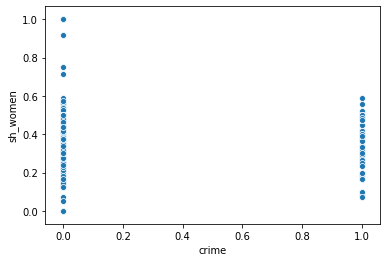

In [179]:
sns.scatterplot(data=data_together_2[data_together_2['year']==2019], x="crime", y="sh_women")

In [180]:
d = {'year': [2014, 2019], 'mean_share_women_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0) & (data_together['party'].str.contains('SPD'))]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)& (data_together['party'].str.contains('SPD'))]['sh_women'].mean()],
    'mean_share_women_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0) & (data_together['party'].str.contains('SPD'))]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)& (data_together['party'].str.contains('SPD'))]['sh_women'].mean()],
    'mean_share_muslim_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0)& (data_together['party'].str.contains('SPD'))]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)& (data_together['party'].str.contains('SPD'))]['sh_muslim'].mean()],
    'mean_share_muslim_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0)& (data_together['party'].str.contains('SPD'))]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)& (data_together['party'].str.contains('SPD'))]['sh_muslim'].mean()]}
party_cond_mean = pd.DataFrame(d)
party_cond_mean

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Ser

,year,mean_share_women_no_viol,mean_share_women_viol,mean_share_muslim_no_viol,mean_share_muslim_viol
0,2014,0.404936,NaN,0.034822,NaN
1,2019,0.414347,0.473136,0.047898,0.051213


In [181]:
d = {'year': [2014, 2019], 'mean_share_women_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0) & (data_together['party'].str.contains('FDP'))]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)& (data_together['party'].str.contains('FDP'))]['sh_women'].mean()],
    'mean_share_women_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0) & (data_together['party'].str.contains('FDP'))]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)& (data_together['party'].str.contains('FDP'))]['sh_women'].mean()],
    'mean_share_muslim_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0)& (data_together['party'].str.contains('FDP'))]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)& (data_together['party'].str.contains('FDP'))]['sh_muslim'].mean()],
    'mean_share_muslim_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0)& (data_together['party'].str.contains('FDP'))]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)& (data_together['party'].str.contains('FDP'))]['sh_muslim'].mean()]}
party_cond_mean = pd.DataFrame(d)
party_cond_mean

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Ser

,year,mean_share_women_no_viol,mean_share_women_viol,mean_share_muslim_no_viol,mean_share_muslim_viol
0,2014,0.235437,NaN,0.013809,NaN
1,2019,0.268053,0.294825,0.018494,0.02886


In [183]:
d = {'year': [2014, 2019], 'mean_share_women_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0) & (data_together['party'].str.contains('AfD'))]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)& (data_together['party'].str.contains('AfD'))]['sh_women'].mean()],
    'mean_share_women_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0) & (data_together['party'].str.contains('AfD'))]['sh_women'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)& (data_together['party'].str.contains('AfD'))]['sh_women'].mean()],
    'mean_share_muslim_no_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] == 0)& (data_together['party'].str.contains('AfD'))]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019)& (data_together['crime'] == 0)& (data_together['party'].str.contains('AfD'))]['sh_muslim'].mean()],
    'mean_share_muslim_viol': [data_together_2[(data_together_2['year']==2014) & (data_together['crime'] > 0)& (data_together['party'].str.contains('AfD'))]['sh_muslim'].mean(), data_together_2[(data_together_2['year']==2019) & (data_together['crime'] > 0)& (data_together['party'].str.contains('AfD'))]['sh_muslim'].mean()]}
party_cond_mean = pd.DataFrame(d)
party_cond_mean

C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Ser

,year,mean_share_women_no_viol,mean_share_women_viol,mean_share_muslim_no_viol,mean_share_muslim_viol
0,2014,0.161310,NaN,0.009524,NaN
1,2019,0.306338,0.226407,0.012500,0.002344
